In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
xls = pd.ExcelFile('HospitalDatabase.xlsx')
discharge_df = pd.read_excel(xls, 'Discharges')
patients_df = pd.read_excel(xls, 'Patients')
visits_df = pd.read_excel(xls, 'EDVisits')

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(discharge_df)
prof.to_file(output_file='output.html')

#### Another very basic and widely used functions. Because it is necessary to know the data types of the variables before we dive into the analysis, visualization, or predictive modeling.

In [5]:
import pandas as pd
xls = pd.ExcelFile('HospitalDatabase.xlsx')
discharge_df = pd.read_excel(xls, 'Discharges')
patients_df = pd.read_excel(xls, 'Patients')
visits_df = pd.read_excel(xls, 'EDVisits')
# dtypes is used to find the datatypes of the variables
discharge_df.dtypes

AdmissionID                      int64
PatientID                        int64
AdmissionDate           datetime64[ns]
DischargeDate           datetime64[ns]
DischargeDisposition            object
Service                         object
PrimaryDiagnosis                object
ExpectedLOS                    float64
ExpectedMortality              float64
dtype: object

#### You can select the variables or columns of a certain data type using this function. For example, I want to select the columns with data types ‘int64’ only from discharges dataframe we can use the below statement


In [6]:
discharge_df.select_dtypes(include='int64')


,AdmissionID,PatientID
0,1,9
1,257,93
2,152,101
3,361,102
4,258,103
...,...,...
715,715,716
716,698,723
717,704,724
718,716,733


#### Create multiple graphs in one canvas using ggplot2


In [7]:
pip install plotnine


Note: you may need to restart the kernel to use updated packages.


                                   PatientID
EDDisposition ReasonForVisit                
Admitted      Accident                    39
              Bleeding                    16
              Car Accident                17
              Chest Pain                  94
              Fever                       46
              Gun Shot                    16
              Migraine                    47
              Pneumonia                  136
              Shortness of Breath         72
              Stomach Ache                32
Discharged    Bleeding                    15
              Chest Pain                  15
              Cough                        1
              Fever                      188
              Intoxication                30
              Laceration                  30
              Migraine                   109
              Pneumonia                   65
              Shortness of Breath         77
              Stomach Ache               154


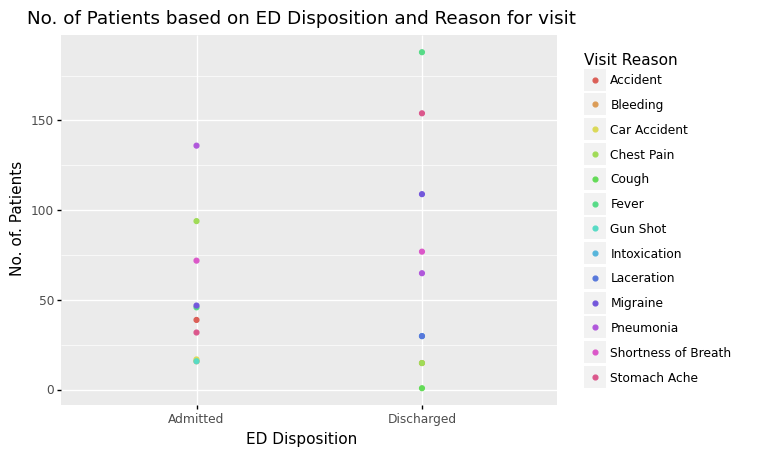

<ggplot: (123139967281)>

In [8]:
count_df = visits_df[['PatientID','EDDisposition','ReasonForVisit' ]].groupby(['EDDisposition','ReasonForVisit']).count()
print(count_df)

from plotnine import ggplot, aes, labs, geom_point
(
    ggplot(count_df.reset_index())
    + aes(x="EDDisposition", y="PatientID", color="ReasonForVisit")
    + labs(
        x="ED Disposition",
        y="No. of. Patients",
        color="Visit Reason",
        title="No. of Patients based on ED Disposition and Reason for visit",
    )
    + geom_point()
)


# # count_df.plot(kind='bar')count_df = visits_df[['PatientID','ReasonForVisit']].groupby(['ReasonForVisit']).count()
# # print(count_df)
# count_df.plot(kind='bar')

#### Calculate the age of the patients as of today using function

In [13]:
from datetime import datetime, date
#  Step 1: convert datetime column to just date
patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date
# extracting age from date of birth 

# Step 2: Calculate age(This function converts given date to age)
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01,Male,White,English,62
1,2,Far,Myers,1985-11-15,Male,White,English,36
2,3,Devlin,Michael,1976-04-15,Male,White,English,46
3,4,Carmine,Texas,1968-10-15,Male,White,English,53
4,5,Tann,Bama,1962-05-01,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58


#### Spliting the patients data in to 4 quartiles using pd.qcut function


#### qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary. On the other hand, cut is used to specifically define the bin edges.


In [14]:
from datetime import datetime, date
# Step 1: convert datetime column to just date
patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date

# Step 2: Calculate age(This function converts given date to age)
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
# display the dataframe with new age column
display(patients_df)
# Step 4: Split the records in to quartiles
labels = ['Below 40','Below 50','Below 60','Below 70']
patients_df['Yr_qcut'] = pd.qcut(patients_df.Age, q=4,
                        labels=labels)
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01,Male,White,English,62
1,2,Far,Myers,1985-11-15,Male,White,English,36
2,3,Devlin,Michael,1976-04-15,Male,White,English,46
3,4,Carmine,Texas,1968-10-15,Male,White,English,53
4,5,Tann,Bama,1962-05-01,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Yr_qcut
0,1,Lanni,Sue,1960-01-01,Male,White,English,62,Below 70
1,2,Far,Myers,1985-11-15,Male,White,English,36,Below 40
2,3,Devlin,Michael,1976-04-15,Male,White,English,46,Below 50
3,4,Carmine,Texas,1968-10-15,Male,White,English,53,Below 60
4,5,Tann,Bama,1962-05-01,Male,White,English,60,Below 70
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35,Below 40
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51,Below 60
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39,Below 40
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58,Below 70
